In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
# File paths for the train and test datasets in Google Drive
train_file_path = '/content/drive/My Drive/DATASET/train_transformed.csv'
test_file_path = '/content/drive/My Drive/DATASET/test_transformed.csv'

# Load the datasets into DataFrames
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [ ]:
# Define features and target variable
X = train_df.drop(columns=['Exited'])
y = train_df['Exited']

# Split the data into 80% for training and 20% for validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into 50% for validation and 50% for testing (total of 20% of the data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the size of the datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 12000
Validation set size: 1500
Test set size: 1500


## 1.Random Forset

In [ ]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf.predict(X_val)
y_val_probs = rf.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Evaluate the model on the validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8893333333333333

Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      1190
         1.0       0.81      0.61      0.70       310

    accuracy                           0.89      1500
   macro avg       0.86      0.79      0.81      1500
weighted avg       0.88      0.89      0.88      1500



Test Accuracy: 0.9066666666666666

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1196
         1.0       0.84      0.67      0.74       304

    accuracy                           0.91      1500
   macro avg       0.88      0.82      0.84      1500
weighted avg       0.90      0.91      0.90      1500

Test AUC-ROC Score: 0.9287


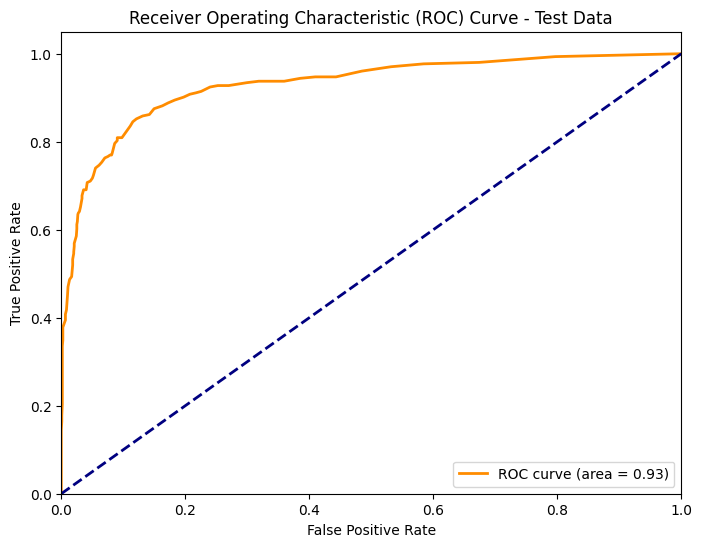

In [ ]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)
y_test_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

# Calculate the AUC-ROC score on the test set
roc_auc_test = roc_auc_score(y_test, y_test_probs)
print(f"Test AUC-ROC Score: {roc_auc_test:.4f}")

# Plot the ROC Curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test_value = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data')
plt.legend(loc="lower right")
plt.show()

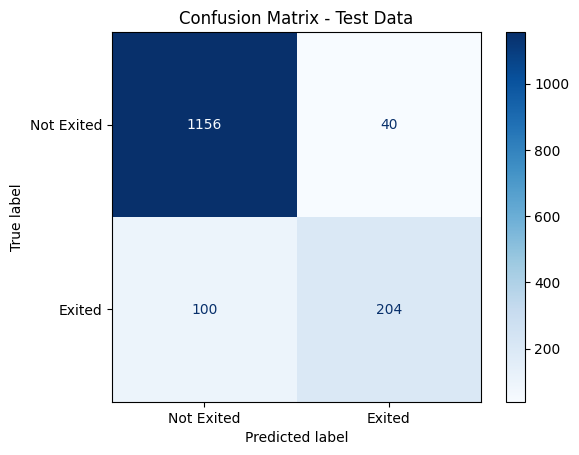

Confusion Matrix - Test Data:
 [[1156   40]
 [ 100  204]]


In [ ]:


# Calculate and display the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(conf_matrix_test, display_labels=['Not Exited', 'Exited'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Data')
plt.show()
print("Confusion Matrix - Test Data:\n", conf_matrix_test)

## Identifying and Exporting High-Risk Customers Based on Churn Probability

In [ ]:
# 1. Make predictions on the test set and get probabilities for class '1' (Exited)
y_test_probs = rf.predict_proba(X_test)[:, 1]

# 2. Create a DataFrame with all customer information and add the 'Churn_Probability' column
clients_test = X_test.copy()
clients_test['Churn_Probability'] = y_test_probs

# If you have the true labels (True_Label), you can also add them
clients_test['True_Label'] = y_test  # Add the actual label if available

# 3. Set a probability threshold, to identify high-risk customers
threshold = 0.7
clients_high_risk = clients_test[clients_test['Churn_Probability'] > threshold]

# 4. Display information for high-risk customers
print(clients_high_risk)

# Save the results
clients_high_risk.to_csv('/content/drive/My Drive/DATASET/high_risk_customers.csv', index=False)

# Print the number of high-risk customers identified
print(f"Number of high-risk customers: {clients_high_risk.shape[0]}")

          id  CustomerId  CreditScore  Gender   Age  Tenure    Balance  \
10005  10005  15576077.0        679.0       0  50.0     7.0       0.00   
5597    5597  15684958.0        638.0       1  41.0     3.0       0.00   
14681  14681  15591698.0        684.0       1  53.0     3.0       0.00   
4010    4010  15783883.0        656.0       1  52.0     7.0  127631.62   
5932    5932  15684512.0        613.0       1  47.0     9.0  135096.05   
...      ...         ...          ...     ...   ...     ...        ...   
9481    9481  15792986.0        757.0       1  52.0    10.0       0.00   
736      736  15761706.0        850.0       1  45.0    10.0       0.00   
12123  12123  15574879.0        554.0       1  51.0     4.0       0.00   
1297    1297  15694296.0        545.0       1  59.0     6.0       0.00   
6560    6560  15729557.0        585.0       1  43.0     3.0       0.00   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
10005            1.0        1.0            

## 2. Logictic Regression

Logistic Regression - Validation Set
Accuracy: 0.7933333333333333
Logistic Regression - Test Set
Accuracy: 0.796

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1196
         1.0       0.00      0.00      0.00       304

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.64      0.80      0.71      1500

AUC-ROC Score on Test Data: 0.6022


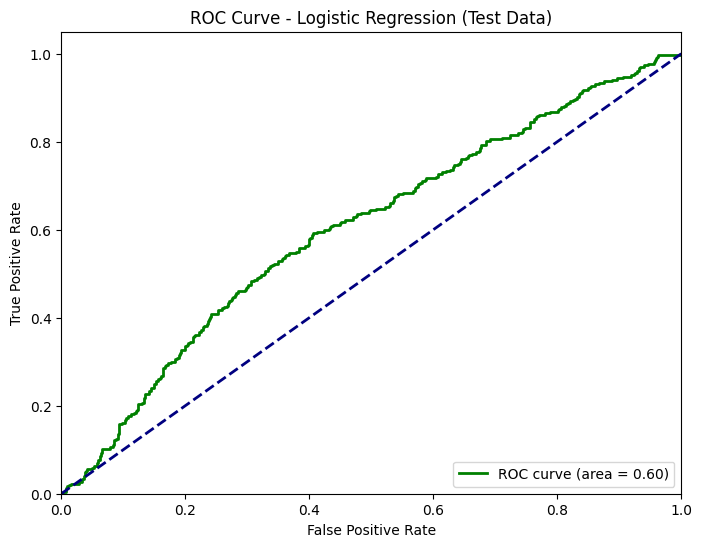

In [ ]:
# Import the logistic regression model from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the logistic regression model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_log = log_reg.predict(X_val)
y_val_probs_log = log_reg.predict_proba(X_val)[:, 1]

# Evaluate the model on validation set
print("Logistic Regression - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_log))

# Make predictions on the test set
y_test_pred_log = log_reg.predict(X_test)
y_test_probs_log = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model on test set
print("Logistic Regression - Test Set")
print("Accuracy:", accuracy_score(y_test, y_test_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_log))

# Calculate AUC-ROC score on test set
roc_auc_test_log = roc_auc_score(y_test, y_test_probs_log)
print(f"AUC-ROC Score on Test Data: {roc_auc_test_log:.4f}")

# Plot the ROC curve for test data
fpr_test_log, tpr_test_log, _ = roc_curve(y_test, y_test_probs_log)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_log, tpr_test_log, color='green', lw=2, label=f'ROC curve (area = {roc_auc_test_log:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Test Data)')
plt.legend(loc="lower right")
plt.show()


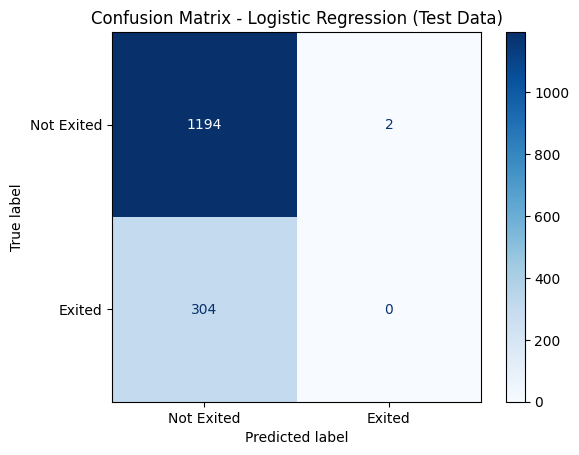

Confusion Matrix - Logistic Regression (Test Data):
 [[1194    2]
 [ 304    0]]


In [ ]:
# Generate confusion matrix for logistic regression on test set
conf_matrix_log = confusion_matrix(y_test, y_test_pred_log)

# Display the confusion matrix for logistic regression
disp_log = ConfusionMatrixDisplay(conf_matrix_log, display_labels=['Not Exited', 'Exited'])
disp_log.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression (Test Data)')
plt.show()

# Print the confusion matrix for logistic regression
print("Confusion Matrix - Logistic Regression (Test Data):\n", conf_matrix_log)

## 3.LightGBM

[LightGBM] [Info] Number of positive: 2449, number of negative: 9551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1347
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.204083 -> initscore=-1.360966
[LightGBM] [Info] Start training from score -1.360966
LightGBM - Validation Set
Accuracy: 0.8986666666666666
LightGBM - Test Set
Accuracy: 0.9073333333333333

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1196
         1.0       0.81      0.71      0.76       304

    accuracy                           0.91      1500
   macro avg       0.87      0.84      0.85      1500
weighted avg       0.90      0.91      0.91

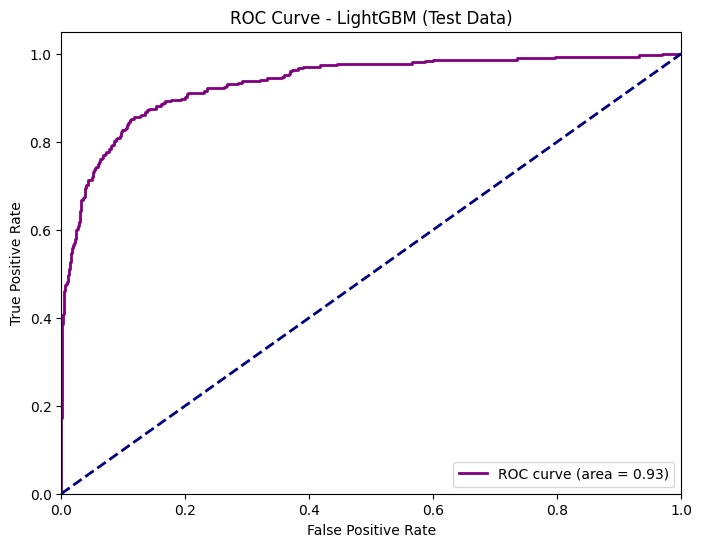

In [ ]:
# Import LightGBM model
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_lgb = lgb_model.predict(X_val)
y_val_probs_lgb = lgb_model.predict_proba(X_val)[:, 1]

# Evaluate the model on validation set
print("LightGBM - Validation Set")
print("Accuracy:", accuracy_score(y_val, y_val_pred_lgb))

# Make predictions on the test set
y_test_pred_lgb = lgb_model.predict(X_test)
y_test_probs_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model on test set
print("LightGBM - Test Set")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_lgb))

# Calculate AUC-ROC score on test set
roc_auc_test_lgb = roc_auc_score(y_test, y_test_probs_lgb)
print(f"AUC-ROC Score on Test Data: {roc_auc_test_lgb:.4f}")

# Plot the ROC curve for test data
fpr_test_lgb, tpr_test_lgb, _ = roc_curve(y_test, y_test_probs_lgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_lgb, tpr_test_lgb, color='purple', lw=2, label=f'ROC curve (area = {roc_auc_test_lgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM (Test Data)')
plt.legend(loc="lower right")
plt.show()

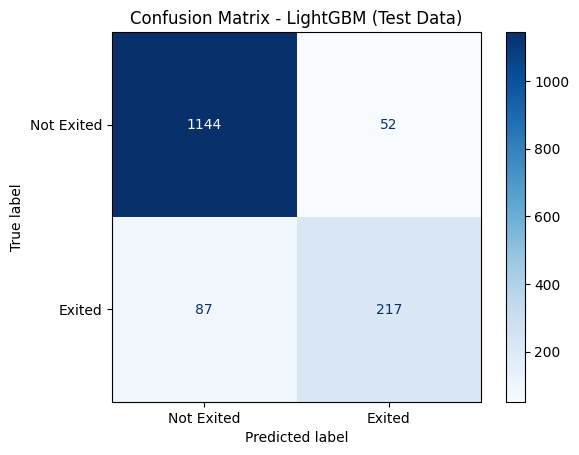

Confusion Matrix - LightGBM (Test Data):
 [[1144   52]
 [  87  217]]


In [ ]:
# Generate confusion matrix for LightGBM on test set
conf_matrix_lgb = confusion_matrix(y_test, y_test_pred_lgb)

# Display the confusion matrix for LightGBM
disp_lgb = ConfusionMatrixDisplay(conf_matrix_lgb, display_labels=['Not Exited', 'Exited'])
disp_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - LightGBM (Test Data)')
plt.show()

# Print the confusion matrix for LightGBM
print("Confusion Matrix - LightGBM (Test Data):\n", conf_matrix_lgb)

In [ ]:
# 1. Make predictions on the test set and get probabilities for class '1' (Exited) using LightGBM
y_test_probs_lgbm = lgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (churn)

# 2. Create a DataFrame with all customer information and add the 'Churn_Probability' column
clients_test = X_test.copy()  # Copy the DataFrame with customer features
clients_test['Churn_Probability'] = y_test_probs_lgbm  # Add churn probability column

# If you have the true labels (True_Label), you can also add them
clients_test['True_Label'] = y_test  # Add the true label if available

# 3. Set a probability threshold, e.g., 0.7, to identify high-risk customers
threshold = 0.7
clients_high_risk = clients_test[clients_test['Churn_Probability'] > threshold]

# 4. Display information for high-risk customers
print(clients_high_risk)

# Save the results in a CSV file for further analysis and sharing
clients_high_risk.to_csv('/content/drive/My Drive/DATASET/high_risk_customers_lgbm.csv', index=False)

# Print the number of high-risk customers identified
print(f"Number of high-risk customers identified: {clients_high_risk.shape[0]}")


          id  CustomerId  CreditScore  Gender   Age  Tenure  Balance  \
10005  10005  15576077.0        679.0       0  50.0     7.0      0.0   
11994  11994  15707042.0        724.0       1  56.0     1.0      0.0   
5597    5597  15684958.0        638.0       1  41.0     3.0      0.0   
14681  14681  15591698.0        684.0       1  53.0     3.0      0.0   
3963    3963  15725024.0        639.0       0  44.0     9.0      0.0   
...      ...         ...          ...     ...   ...     ...      ...   
9481    9481  15792986.0        757.0       1  52.0    10.0      0.0   
736      736  15761706.0        850.0       1  45.0    10.0      0.0   
12123  12123  15574879.0        554.0       1  51.0     4.0      0.0   
1297    1297  15694296.0        545.0       1  59.0     6.0      0.0   
6560    6560  15729557.0        585.0       1  43.0     3.0      0.0   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
10005            1.0        1.0             0.0        140941.47   